In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv('/content/dataset1.csv')
df = df.drop(["Unnamed: 0"], axis=1)

In [0]:
X = df.drop(["y"], axis = 1)
y = df["y"]

In [0]:
for i in range(len(y)):
  if y[i] == 10: y[i]=1

In [5]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5711    1.0
5712    1.0
5713    1.0
5714    1.0
5715    1.0
Name: y, Length: 5716, dtype: float64

In [0]:
X_train, X_a, y_train, y_a = train_test_split(X,y,test_size = 2/12)

In [0]:
X_b,X_test,y_b,y_test = train_test_split(X_a,y_a,test_size = 1/2)

In [0]:
X_train_shaped = np.expand_dims(X_train, axis=2)
X_test_shaped = np.expand_dims(X_test, axis=2)

# CNN Model


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.optimizers import Adam, RMSprop
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
X_train.shape

(4763, 4)

In [11]:
model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (4,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation = 'sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
history = model.fit(X_train_shaped, y_train, validation_data = (X_test_shaped,y_test), epochs = 100)




Train on 4763 samples, validate on 477 samples
Epoch 1/100





4763/4763 [==============================] - 1s 125us/step - loss: 0.9472 - acc: 0.5062 - val_loss: 0.9014 - val_acc: 0.4906
Epoch 2/100
4763/4763 [==============================] - 0s 51us/step - loss: 0.9222 - acc: 0.5062 - val_loss: 0.8747 - val_acc: 0.4969
Epoch 3/100
4763/4763 [==============================] - 0s 53us/step - loss: 0.9096 - acc: 0.5112 - val_loss: 0.8503 - val_acc: 0.5052
Epoch 4/100
4763/4763 [==============================] - 0s 53us/step - loss: 0.8879 - acc: 0.5159 - val_loss: 0.8289 - val_acc: 0.5241
Epoch 5/100
4763/4763 [==============================] - 0s 49us/step - loss: 0.8620 - acc: 0.5339 - val_loss: 0.8099 - val_acc: 0.5535
Epoch 6/100
4763/4763 [==============================] - 0s 50us/step - loss: 0.8540 - acc: 0.5289 - val_loss: 0.7888 - val_acc: 0.5597
Epoch 7/100
4763/4763 [==============================] - 0s 51us/step - loss: 0.8055 - acc: 0.5413 - val_loss: 0.7701 - val_acc:

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 64)             256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
____________________________________________________

In [0]:
X_b_shaped = np.expand_dims(X_b, axis=2)
count=0
test_pred = model.predict_classes(X_b_shaped)
k1 = np.array(test_pred[:,0])
k2 = np.array(y_b)
for i in range(len(y_b)):
  if k1[i] == k2[i]:
    count = count+1
accuracy = (count*100)/len(y_b)

In [16]:
accuracy

69.74789915966386

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
acc = accuracy_score(k2, k1)
f1 = f1_score(k2, test_pred[:,0])
y_score = model.predict_proba(X_b_shaped)
roc = roc_auc_score(k2, y_score)
print('The accuracy of this model is ' + str(acc))
print('The f1 score of this model is ' + str(f1))
print('The area under curve of this model is ' + str(roc))
print('The confusion matrix is as follows:')
print(confusion_matrix(y_b, test_pred[:,0]))

The accuracy of this model is 0.6974789915966386
The f1 score of this model is 0.6785714285714285
The area under curve of this model is 0.7801885460066379
The confusion matrix is as follows:
[[180  58]
 [ 86 152]]


Text(0, 0.5, 'True Positive Rate')

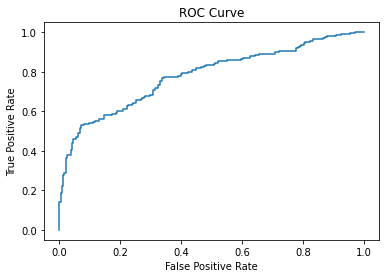

In [21]:
fpr, tpr,x = roc_curve( k2, y_score)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Testing on New files

In [0]:
import numpy as np
import math
import cv2

In [0]:
from scipy.spatial import distance
from mlxtend.image import extract_face_landmarks

In [0]:
def images(x):
    vc.set(cv2.CAP_PROP_POS_MSEC, x)
    result,image = vc.read()
    return result, image

In [0]:
path = '/content/drive/My Drive/Untitled folder/Video/'
filename = 'test5.mp4'

In [179]:
lm =[]
frames_max = 300 #number of frames needed per video
vc = cv2.VideoCapture(path + filename)
tim = 0
result, image  = images(tim)
count = 0
while result and count < frames_max: 
    landmarks = extract_face_landmarks(image)
    if sum(sum(landmarks)) != 0:
        lm.append(landmarks)
        tim +=600 
        result, image = images(tim)
        count += 1
        if count%10 == 0: print('Extracted face landmarks from '+str(count)+' frames')
    else:  
        tim += 600
        result, image = images(tim)
        print('Face not detected in this frame, till now extracted from '+str(count)+' frames')
lm = np.array(lm)

Extracted face landmarks from 10 frames
Extracted face landmarks from 20 frames
Extracted face landmarks from 30 frames
Extracted face landmarks from 40 frames
Extracted face landmarks from 50 frames
Extracted face landmarks from 60 frames
Extracted face landmarks from 70 frames
Extracted face landmarks from 80 frames
Extracted face landmarks from 90 frames
Extracted face landmarks from 100 frames
Extracted face landmarks from 110 frames
Extracted face landmarks from 120 frames
Extracted face landmarks from 130 frames
Extracted face landmarks from 140 frames
Extracted face landmarks from 150 frames
Extracted face landmarks from 160 frames
Extracted face landmarks from 170 frames
Extracted face landmarks from 180 frames
Extracted face landmarks from 190 frames
Extracted face landmarks from 200 frames
Extracted face landmarks from 210 frames


In [0]:
def EAR(arr):
	x1,x2,x3 = distance.euclidean(arr[1], arr[5]),distance.euclidean(arr[2], arr[4]),distance.euclidean(arr[0], arr[3])
	frac = (x1+ x2) / (2.0 * x3)
	return frac

def MAR(arr):
    x1,x2 = distance.euclidean(arr[14], arr[18]), distance.euclidean(arr[12], arr[16])
    frac = x1/x2
    return frac

def PUC(arr):
    r = distance.euclidean(arr[1], arr[4])/2.0
    area = math.pi*(r**2)
    peri = 0
    for i in range(0,5):
      peri = peri + distance.euclidean(arr[i], arr[i+1])
    peri = peri + distance.euclidean(arr[5], arr[0])
    return 4 * math.pi * area /(peri**2)

In [0]:
features = []
for l in lm:
  mainMarks = l[36:68]
  x1, x2, x3 = EAR(mainMarks), MAR(mainMarks), PUC(mainMarks)
  features.append([x1, x2, x3, x2/x1])
features = np.array(features)

In [0]:
np.savetxt("test5.csv", features, delimiter = ",")

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/test5.csv')

In [0]:
df.columns = ['x1','x2','x3','x4']

In [0]:
df_temp = df.iloc[0:3, :]
df_mean = df_temp.mean()
df_std = df_temp.std()
df["x1_norm"]=(df["x1"]-df_mean["x1"])/df_std["x1"]
df["x2_norm"]=(df["x2"]-df_mean["x2"])/df_std["x2"]
df["x3_norm"]=(df["x3"]-df_mean["x3"])/df_std["x3"]
df["x4_norm"]=(df["x4"]-df_mean["x4"])/df_std["x4"]

In [239]:
df

,x1,x2,x3,x4,x1_norm,x2_norm,x3_norm,x4_norm
0,0.299626,0.970143,0.431116,3.237848,-0.854937,-0.966736,-1.113662,0.870440
1,0.315353,0.977050,0.467124,3.098273,-0.244701,-0.063502,0.292600,0.221857
2,0.350000,0.985414,0.480655,2.815469,1.099638,1.030238,0.821062,-1.092297
3,0.333333,0.987916,0.507924,2.963749,0.452954,1.357455,1.886043,-0.403259
4,0.302069,0.959827,0.437804,3.177507,-0.760132,-2.315702,-0.852469,0.590044
...,...,...,...,...,...,...,...,...
117,0.122859,1.591693,0.236961,12.955444,-7.713667,80.310241,-8.696348,46.026725
118,0.186052,1.490875,0.397950,8.013211,-5.261710,67.126726,-2.408936,23.060871
119,0.217061,1.547742,0.390329,7.130455,-4.058541,74.562980,-2.706572,18.958829
120,0.218750,1.413513,0.397307,6.461775,-3.992998,57.010571,-2.434059,15.851570


In [0]:
df = df.drop(["x1","x2","x3","x4"],axis=1)

In [241]:
df

,x1_norm,x2_norm,x3_norm,x4_norm
0,-0.854937,-0.966736,-1.113662,0.870440
1,-0.244701,-0.063502,0.292600,0.221857
2,1.099638,1.030238,0.821062,-1.092297
3,0.452954,1.357455,1.886043,-0.403259
4,-0.760132,-2.315702,-0.852469,0.590044
...,...,...,...,...
117,-7.713667,80.310241,-8.696348,46.026725
118,-5.261710,67.126726,-2.408936,23.060871
119,-4.058541,74.562980,-2.706572,18.958829
120,-3.992998,57.010571,-2.434059,15.851570


In [0]:
df = np.expand_dims(df, axis=2)
tp = model.predict_classes(df)

In [0]:
tp = np.array(tp)

In [0]:
val = []
for i in range(len(tp)): val.append(tp[i][0])

# Output graph

Text(0.5, 1.0, 'label vs time')

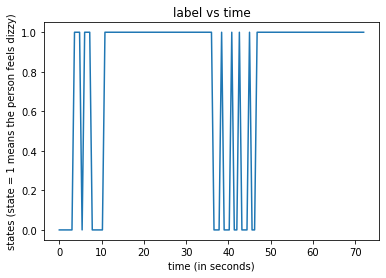

In [245]:
x = np.arange(0,(len(val)*0.6)-1,0.6)
plt.plot(x,val[:len(val)-1])
plt.xlabel('time (in seconds)')
plt.ylabel('states (state = 1 means the person feels dizzy)')
plt.title('label vs time')

# Generating JSON file

In [0]:
fin=[]
for i in range(len(val)):
  fin.append([str(i*0.6),str(val[i])])

In [0]:
dt = {}
dt['dizzy']=fin

In [0]:
import json

In [0]:
with open('test5.json', 'w') as f:
    json.dump(dt, f)